# Introduction to Dynamic Programming: Homework

## Problem 1: Cake-eating Problem

Start with the infinitely-lived cake-eating problem. The per-period utility function is $u(c) = ln(c)$ and the discount rate is $\beta=0.99$. The cake is of initial size $x_0 = 1$. The law of motion for the cake is $x' = x- c$.
1. What is the state variable of the problem?
1. Set up the Bellman Equation.
1. Solve for the value function and plot it.
1. Plot the consumption path.
1. Plot the consumption path for $\beta=0.9$ and $\beta=0.9999$. How and why are they different from your original solution?

Suppose the cake depreciates at rate $\delta$. That is the law of motion for each cake is $x' = (1-\delta)x - c$. 
1. Solve the problem and plot the consumption path with $\delta=0$ and $\delta=0.1$. Explain why these consumption paths are different.

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.

## Problem 2: Finite-horizon Cake-eating Problem

The household lives for $T$ periods. The per-period utility function is $u(c) = ln(c)$ and the discount rate is $\beta=0.99$. The cake is of initial size $x_0 = 1$. The law of motion for the cake is $x' = x- c$.
1. What is the state variable of the problem?
1. Set up the Bellman Equation.
1. What does the Bellman Equation look like in period $T$?
1. Let $T=50$ and solve backwards. Then solve for $T=500$.
1. Plot the two consumption paths and compare them to your answer in problem 1. How are they different and why?

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.

## Problem 3: FOC from Bellman

1. Derive the FOC for the consumption-savings problem in lecture.
1. How is the FOC related to the Euler Equation?
1. Compute optimal consumption using that FOC and compare it to the consumption path we got in class.
1. Explain why they are different. Which one would you prefer?

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.

## Problem 1 ## 
The state variable is x, how much of the cake is remaining. The Bellman equation is v(x)=sup[u(c)+$\beta$*v(x')]=sup[ln(c)+$\beta$*v(x-c)]

In [195]:
# set up packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import time

In [196]:
# fix parameters beta, r, and y
beta = 0.99
delta=0
x_0 = 1

# construct grid 
xmin = 0
xmax = 1
xgridsize = 100
xgrid=np.linspace(xmin,xmax,xgridsize)


max_iter = 2000
tol = 1e-5
dist = 1
iteration = 0

In [197]:
# utility function 
def utility(c):
    return np.log(c)

In [198]:
# Bellman function 
def Bellman(Vold,beta,xgrid,xgridsize):
    c_candidates=np.linspace(0,1,10000)

    # x's are changing along the columns, c's are changing along the rows
    x_prime_candidates=(1-delta)*xgrid[np.newaxis,:]-c_candidates[:,np.newaxis]

    # interpolate value function at x' given c_candidates
    # np.interp interpolates on the columns (last dimension) of x_prime_candidates
    # want to penalize deviations outside the grid, so we use large negative values as a fill value
    f_interp = interp1d(xgrid, Vold, kind='linear', bounds_error=False, fill_value=(-10000, 0))
    v_prime_candidates = f_interp(x_prime_candidates)

    # calculate utility for all possible consumption choices
    utility_values = utility(c_candidates[:, np.newaxis]) + beta * v_prime_candidates

    # find the consumption choice that maximizes utility
    c_index = np.argmax(utility_values, axis=0) 
    c = c_candidates[c_index]
    Vnew = np.max(utility_values, axis=0)

    return Vnew, c 




In [199]:
# VFI function 
def VFI(V0, xgrid, xgridsize, Bellman, beta=beta, delta=delta, max_iter=max_iter, tol=tol, progress=True):
    start_time=time.time()
    Vold=V0

    # iterate Bellman until convergence 
    for iter in range(max_iter): 
        Vnew, c = Bellman(Vold,beta,xgrid,xgridsize)

        error=np.max(np.abs(Vnew-Vold))
        if error < tol:
            Vstar=Vnew 
            Cstar=c
            print(f"VFI done: {iter} iter, {time.time() - start_time:.2f} seconds")
            return Vstar, Cstar
        else: 
            Vold=Vnew 

        # Show progress
        if progress == True and iter % 50 == 0:
            print(f"VFI in progress: iter {iter}, error {error}")
    
    if iter == max_iter - 1:
        print("VFI Error: No convergence")
        

        

In [184]:
# Solve by VFI
V0 = np.zeros(xgridsize)
Vstar, Cstar = VFI(V0, xgrid, xgridsize, Bellman)

/var/folders/73/bl3tqdsn487d68bft9bnt_m80000gn/T/ipykernel_91932/195765669.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(c)


VFI in progress: iter 0, error 9900.0
VFI in progress: iter 50, error 39.84129376092005
VFI in progress: iter 100, error 15.78783616614055
VFI in progress: iter 150, error 8.503613388976191
VFI in progress: iter 200, error 4.42877248590321
VFI in progress: iter 250, error 2.4763651289929385
VFI in progress: iter 300, error 1.385124941781669
VFI in progress: iter 350, error 0.7859194596201178
VFI in progress: iter 400, error 0.45441492728264166
VFI in progress: iter 450, error 0.2598113231285879
VFI in progress: iter 500, error 0.1532775260170638
VFI in progress: iter 550, error 0.0910181166317443
VFI in progress: iter 600, error 0.054418820265368595
VFI in progress: iter 650, error 0.03267307622684257
VFI in progress: iter 700, error 0.01969484452422421
VFI in progress: iter 750, error 0.011889320291970762
VFI in progress: iter 800, error 0.0071848252313202465
VFI in progress: iter 850, error 0.004344330645722039
VFI in progress: iter 900, error 0.002627741416063145
VFI in progress: it

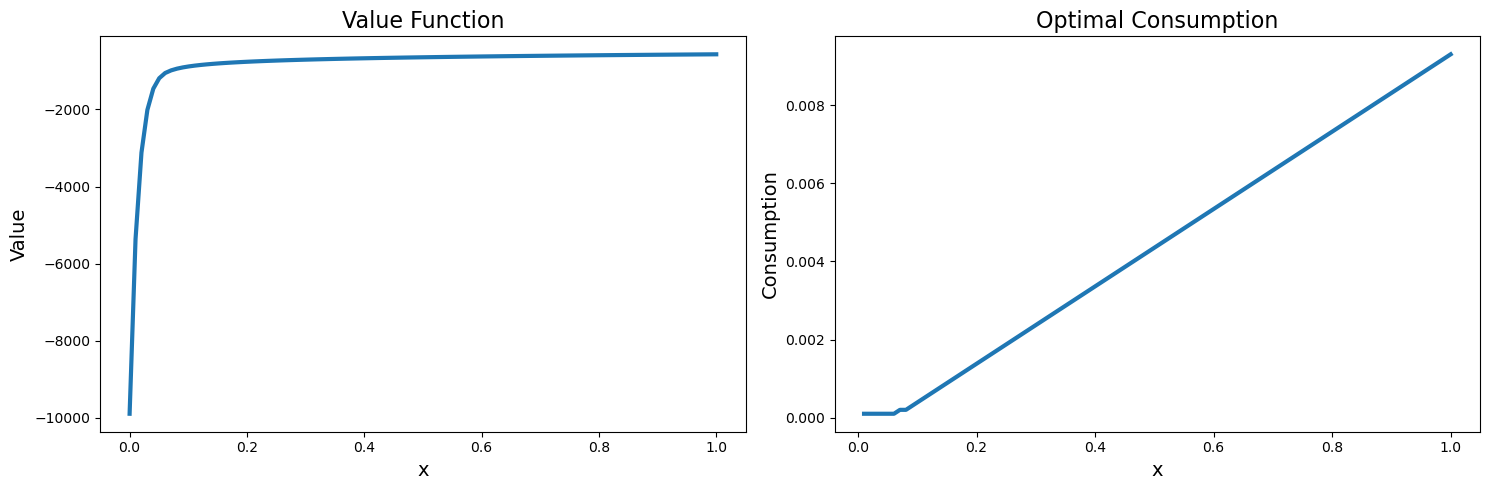

In [185]:
# Plot the graph
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(xgrid, Vstar, linewidth=3)
axs[0].set_xlabel('x', fontsize=14)
axs[0].set_ylabel('Value', fontsize=14)
axs[0].set_title('Value Function', fontsize=16)

x_right=xgrid[1:]
c_right=Cstar[1:]
axs[1].plot(x_right, c_right, linewidth=3)
axs[1].set_xlabel('x', fontsize=14)
axs[1].set_ylabel('Consumption', fontsize=14)
axs[1].set_title('Optimal Consumption', fontsize=16)

plt.tight_layout()
plt.show()

In [186]:
# Do VFI for beta=.90 and beta=.9999
Vstar1, Cstar1 = VFI(V0, xgrid, xgridsize, Bellman, beta=.9)
Vstar2, Cstar2 = VFI(V0, xgrid, xgridsize, Bellman, beta=.9999)


/var/folders/73/bl3tqdsn487d68bft9bnt_m80000gn/T/ipykernel_91932/195765669.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(c)


VFI in progress: iter 0, error 9000.0
VFI in progress: iter 50, error 0.312662300302577
VFI in progress: iter 100, error 0.001072642176637828
VFI done: 144 iter, 1.11 seconds
VFI in progress: iter 0, error 9999.0
VFI in progress: iter 50, error 66.09501175200148
VFI in progress: iter 100, error 43.0103690512924
VFI in progress: iter 150, error 38.1179901748892
VFI in progress: iter 200, error 32.5923721154395
VFI in progress: iter 250, error 29.993423565057128
VFI in progress: iter 300, error 27.460782791684323
VFI in progress: iter 350, error 25.298578421992715
VFI in progress: iter 400, error 23.966986035468835
VFI in progress: iter 450, error 22.146856620233848
VFI in progress: iter 500, error 21.158372265464095
VFI in progress: iter 550, error 20.04055502371557
VFI in progress: iter 600, error 18.718396605005182
VFI in progress: iter 650, error 17.950187407326666
VFI in progress: iter 700, error 17.081956046577034
VFI in progress: iter 750, error 16.118464955134186
VFI in progress:

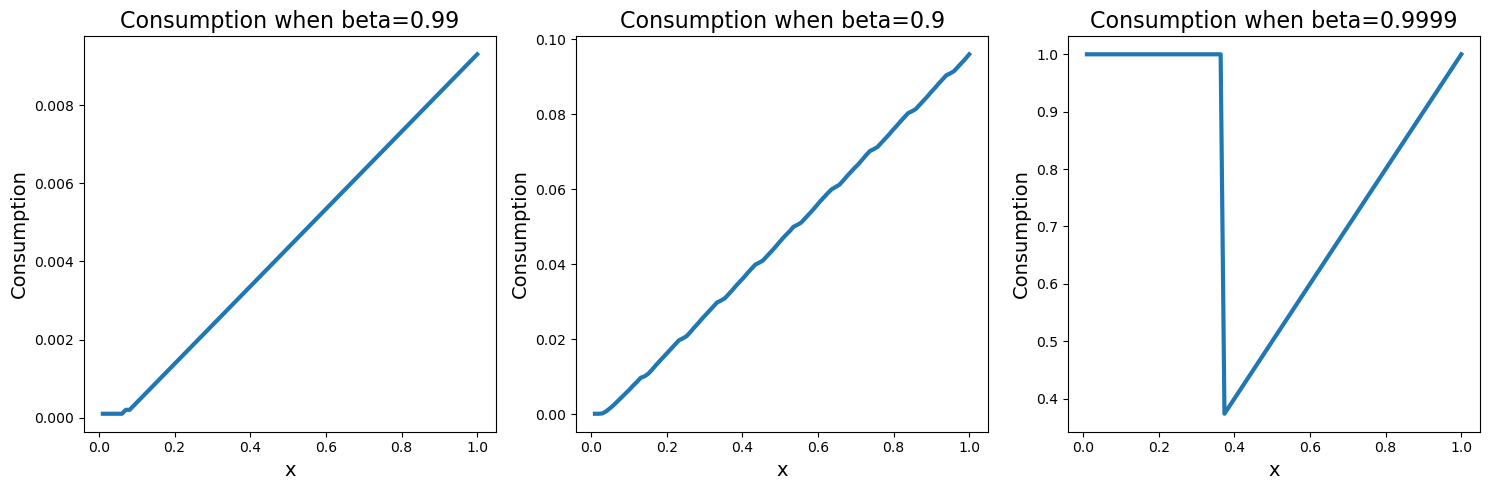

In [187]:
# Plot the graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

x_right=xgrid[1:]
c_right=Cstar[1:]
axs[0].plot(x_right, c_right, linewidth=3)
axs[0].set_xlabel('x', fontsize=14)
axs[0].set_ylabel('Consumption', fontsize=14)
axs[0].set_title('Consumption when beta=0.99', fontsize=16)

c_right1=Cstar1[1:]
axs[1].plot(x_right, c_right1, linewidth=3)
axs[1].set_xlabel('x', fontsize=14)
axs[1].set_ylabel('Consumption', fontsize=14)
axs[1].set_title('Consumption when beta=0.9', fontsize=16)

c_right2=Cstar2[1:]
axs[2].plot(x_right, c_right2, linewidth=3)
axs[2].set_xlabel('x', fontsize=14)
axs[2].set_ylabel('Consumption', fontsize=14)
axs[2].set_title('Consumption when beta=0.9999', fontsize=16)

plt.tight_layout()
plt.show()

In [188]:
Vstar3, Cstar3 = VFI(V0, xgrid, xgridsize, Bellman, delta=0.1)

/var/folders/73/bl3tqdsn487d68bft9bnt_m80000gn/T/ipykernel_91932/195765669.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(c)


VFI in progress: iter 0, error 9900.0
VFI in progress: iter 50, error 39.84129376092005
VFI in progress: iter 100, error 15.78783616614055
VFI in progress: iter 150, error 8.503613388976191
VFI in progress: iter 200, error 4.42877248590321
VFI in progress: iter 250, error 2.4763651289929385
VFI in progress: iter 300, error 1.385124941781669
VFI in progress: iter 350, error 0.7859194596201178
VFI in progress: iter 400, error 0.45441492728264166
VFI in progress: iter 450, error 0.2598113231285879
VFI in progress: iter 500, error 0.1532775260170638
VFI in progress: iter 550, error 0.0910181166317443
VFI in progress: iter 600, error 0.054418820265368595
VFI in progress: iter 650, error 0.03267307622684257
VFI in progress: iter 700, error 0.01969484452422421
VFI in progress: iter 750, error 0.011889320291970762
VFI in progress: iter 800, error 0.0071848252313202465
VFI in progress: iter 850, error 0.004344330645722039
VFI in progress: iter 900, error 0.002627741416063145
VFI in progress: it

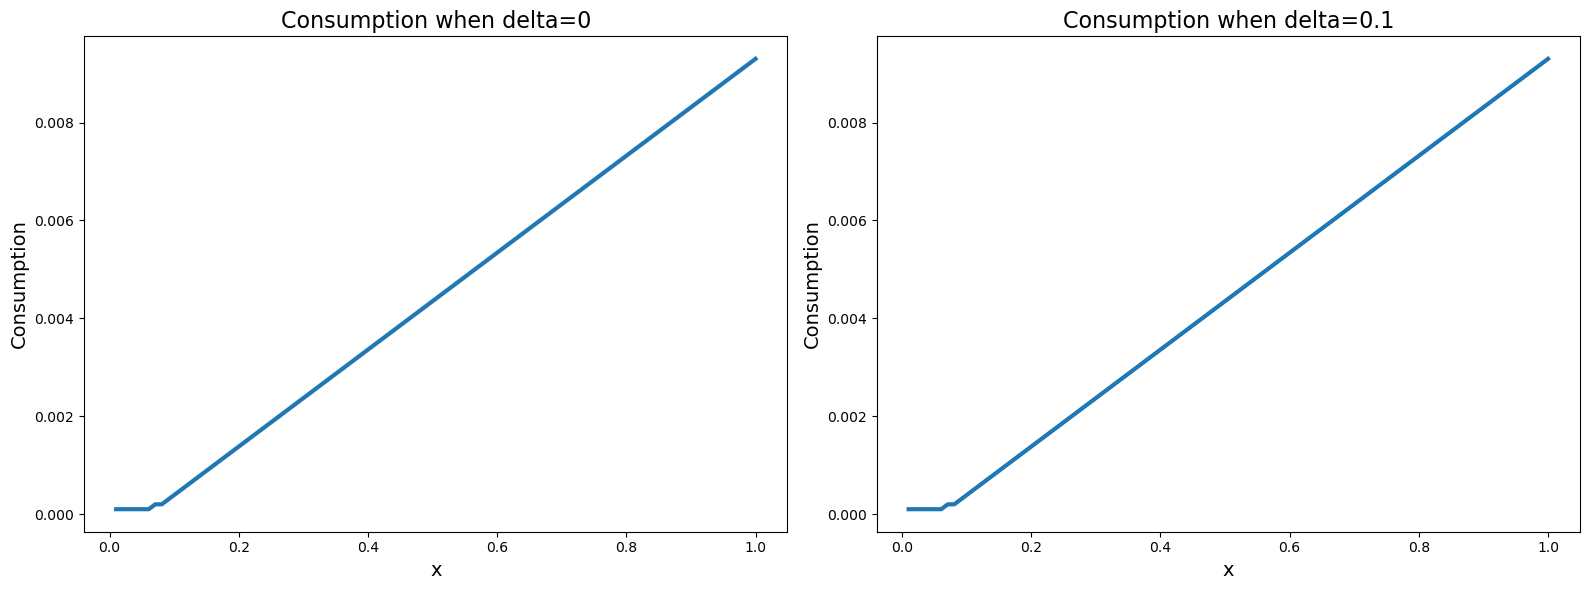

In [189]:
# Plot the graph
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

x_right=xgrid[1:]
c_right=Cstar[1:]
axs[0].plot(x_right, c_right, linewidth=3)
axs[0].set_xlabel('x', fontsize=14)
axs[0].set_ylabel('Consumption', fontsize=14)
axs[0].set_title('Consumption when delta=0', fontsize=16)

x_right3=xgrid[1:]
c_right3=Cstar3[1:]
axs[1].plot(x_right3, c_right3, linewidth=3)
axs[1].set_xlabel('x', fontsize=14)
axs[1].set_ylabel('Consumption', fontsize=14)
axs[1].set_title('Consumption when delta=0.1', fontsize=16)

plt.tight_layout()
plt.show()

## Problem 2 

The state variable and the Bellman equation are the same as in Problem 1. 
In the last period, the continuation value $\beta v(x')$ is zero. Therefore, the Bellman is simply $v(x)=maxln(c)$ s.t. $c=x-x'$. Obviously, it is optimal to consume everything remaining in period T.

In [245]:
# Iterate backwards to solve

def VFI_terminal(xgrid, Bellman, beta=0.99, delta=0.01, T=50):
    start_time=time.time() 
    
    # Now the optimal consumption policy depends on both the period and level of assets
    # Store results in a dictionary, where the key is the period
    #policy = {}
   # V={}
    V={}
    policy = {}

    # Terminal condition 
    # Tells us what the value function is in the last period for all possible remaining cake size
    # Optimal policy is to consume whatever is left in the last period
    V[T]=np.log(xgrid)
    policy[T]=xgrid


    # Iterate backwards from endpoint
    for t in range(T,1,-1): 

        print(f"Period {T}")

        V[t-1], policy[t-1] = Bellman(V[t], beta, xgrid, xgridsize)
        #Vnew, c_policy = Bellman(Vold, beta, xgrid, xgridsize)
        #policy[T-t-1,:]=c_policy 
    
    return V, policy
            

/var/folders/73/bl3tqdsn487d68bft9bnt_m80000gn/T/ipykernel_91932/812692886.py:16: RuntimeWarning: divide by zero encountered in log
  V[T]=np.log(xgrid)
/var/folders/73/bl3tqdsn487d68bft9bnt_m80000gn/T/ipykernel_91932/195765669.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(c)


Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50
Period 50


<function matplotlib.pyplot.show(close=None, block=None)>

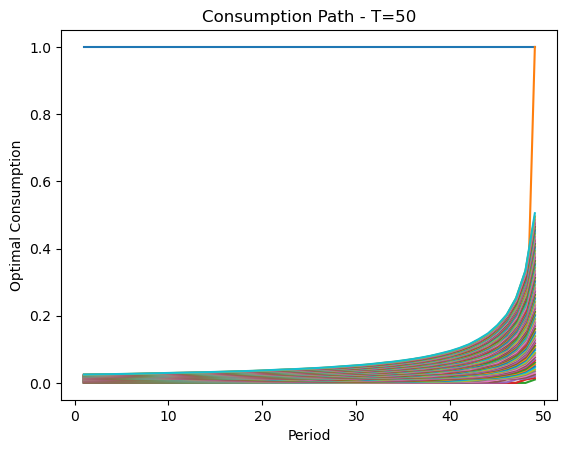

In [246]:
# Run the VFI with terminal condition and plot 
Vstar, Cstar = VFI_terminal(xgrid, Bellman, T=50)

# consumption path
period = list(Cstar.keys())
consumption = list(Cstar.values())

# Plotting the optimal consumption policy for the first few periods
period_right = period[1:]
c_star_right = consumption[1:]
plt.plot(period_right, c_star_right, label='Consumption Path')
plt.xlabel("Period")
plt.ylabel('Optimal Consumption')
plt.title('Consumption Path - T=50')
plt.show

## Problem 3: FOC From Bellman 

The FOC for the consumption savings problem in lecture is $\frac{1}{c}=\beta \frac{1+r}{c'}$. This FOC is the same as the Euler equation but without depreciation.

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define parameters
beta = 0.99
r = (1 / beta) - 1
y = 1
amin = 0
amax = 1
agridsize = 100
agrid = np.linspace(amin, amax, agridsize)

# Repeat the process until the value function converges
max_iter = 2000
tolerance = 1e-5
dist = 1
iteration = 0




In [223]:
# Define EGM function that uses the FOC to find optimal choices 
def EGM(c_old,beta,r,y,agrid,agridsize):

    #Initialize arrays to save consumption and savings choices 
    c = np.zeros(agridsize)
    a=np.zeros(agridsize)

    # Given the consumption grid, compute consumption and savings for every level of assets tomorrow
    for (a_ind, a_prime) in enumerate(agrid):
        # which consumption level is optimal today for every value of tomorrow's consumption
        #c[a_ind]=c_old[a_ind]/(beta(1+r))
        c[a_ind]=(beta * (1+r) * c_old[a_ind]**(-1))**(-1)
        # which asset choice today is optimal for every value of tomorrow's assets
        a[a_ind]=(c[a_ind]+a_prime - y)/(1+r)

    # Compute today's optimal choices
    c_interp = interp1d(a, c, kind='linear', bounds_error=False, fill_value='extrapolate')
    c_new = c_interp(agrid)
    saving = (1+r)*agrid + y - c_new

    return c_new, saving



In [224]:
# Define EGM iteration on the policy function 
def EGM_Iter(c_0, beta, r, y, agrid, agridsize, max_iter, tol, EGM, progress=True, prog_freq=50):

    start_time = time.time()
    c_old = c_0

    # Iterate the EGM operator until convergence
    for iter in range(max_iter):
        c_new, saving = EGM(c_old, beta, r, y, agrid, agridsize)

        # Check convergence & update
        error = np.max(np.abs(c_new - c_old))
        if error < tol:
            c_star = c_new
            print(f"EGM done: {iter} iter, {time.time() - start_time:.2f} seconds")
            return c_star, saving
        else:
            c_old = c_new

        # Show progress
        if progress == True and iter % prog_freq == 0:
            print(f"EGM in progress: iter {iter}, error {error}")
    
    if iter == max_iter - 1:
        print("EGM Error: No convergence")


In [227]:
# Solve by EGM
#c_0=np.zeros(agridsize)
c_0 = np.linspace(1, 2, agridsize)
cstar, saving = EGM_Iter(c_0, beta, r, y, agrid, agridsize, max_iter, tol, EGM)

EGM in progress: iter 0, error 0.4949494949494948
EGM in progress: iter 50, error 0.0003704780373869898
EGM in progress: iter 100, error 8.950128617701836e-05
EGM in progress: iter 150, error 3.622048128848476e-05
EGM in progress: iter 200, error 1.77794612947757e-05
EGM done: 247 iter, 0.03 seconds


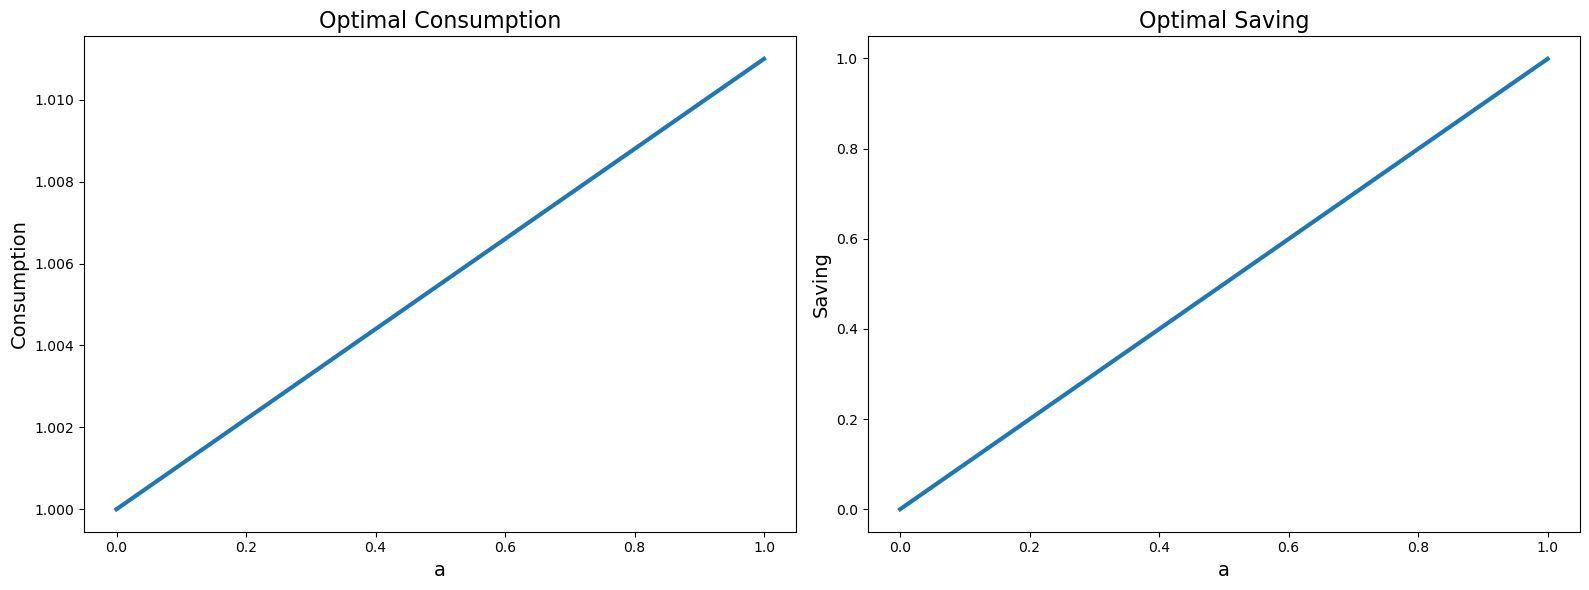

In [228]:
# Plot the graph
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(agrid, cstar, linewidth=3)
axs[0].set_xlabel('a', fontsize=14)
axs[0].set_ylabel('Consumption', fontsize=14)
axs[0].set_title('Optimal Consumption', fontsize=16)

axs[1].plot(agrid, saving, linewidth=3)
axs[1].set_xlabel('a', fontsize=14)
axs[1].set_ylabel('Saving', fontsize=14)
axs[1].set_title('Optimal Saving', fontsize=16)

plt.tight_layout()
plt.show()

EGM consumption path is smoother than the one we got in class. It is preferable to use the FOC because using all the information we have about the problem makes the code more efficient.